# __Construction of the B88 Exchange-Energy Functional in Two Dimensions__

In [13]:
import numpy as np

## Defining the x-values

In [14]:
n=1000
L=5
x=np.linspace(-L,L,n)
h=x[1]-x[0]

## Defining the Derivative Matrix

In [15]:
D=-np.eye(n)+np.diagflat(np.ones(n-1),1)
D = D / h
D2=D.dot(-D.T)
D2[-1,-1]=D2[0,0]

## Getting the eigenvalues and eigenvectors

In [16]:
V = np.diagflat((x**2)/2)
H = -D2/2 + V
E,psi = np.linalg.eigh(H)

## Plotting the eigenvectors

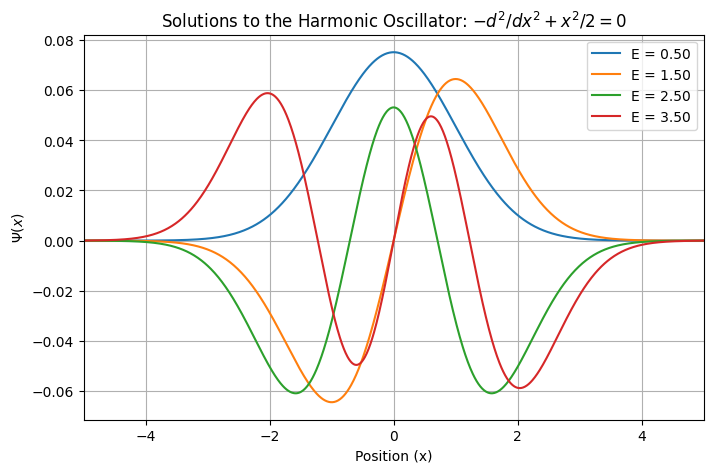

In [17]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,5))
for i in range(4):
    plt.plot(x, psi[:, i], label=f"E = {E[i]:.2f}")
plt.xlabel("Position (x)")
plt.ylabel(r"$\Psi(x)$")
plt.legend(loc=1)
plt.title("Solutions to the Harmonic Oscillator: $-d^2/dx^2 +  x^2 /2 = 0$")
plt.xlim(-L, L)
plt.grid()
plt.show()

## Calculating the n(x)

In [18]:
def integral(x,y,axis=0):
    dx=x[1]-x[0]
    return np.sum(y*dx, axis=axis)


num_electron=17
def get_nx(num_electron, psi, x):
    I=integral(x,psi**2,axis=0)
    psi_normalized=psi/np.sqrt(I)[None, :]

    f_n=[2 for _ in range(num_electron//2)]
    if num_electron % 2:
        f_n.append(1)

    res=np.zeros_like(psi_normalized[:,0])
    for n_e, psi  in zip(f_n,psi_normalized.T):
        res += n_e*(psi**2)
    return res

## Plotting the n(x) for different number of electrons

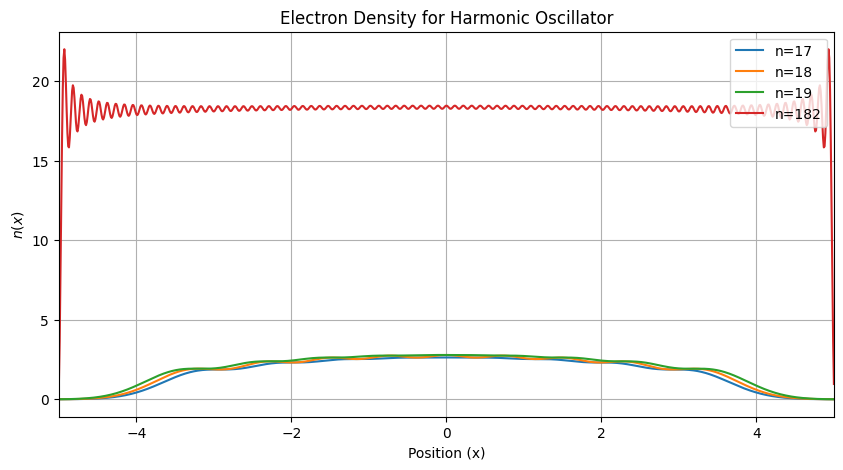

In [26]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
num_electron=[17,18,19,182]
for i in num_electron:
    plt.plot(x, get_nx(i, psi, x), label=f"n={i}")

plt.xlabel("Position (x)")
plt.ylabel(r"$n(x)$")
plt.legend(loc=1)
plt.title("Electron Density for Harmonic Oscillator")
plt.xlim(-L, L)
plt.grid()
plt.show()